In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch.unitroot import PhillipsPerron

In [2]:
data=pd.read_excel('data.xlsx', index_col=0)
data['school enrollment']=data['school enrollment'].fillna(np.mean(data['school enrollment']))

In [3]:
pd.DataFrame(data.describe()).to_excel("datadescriptive.xlsx")

In [4]:
data['gdp']=np.log(data['gdp'])

In [5]:
data.describe()

,cpi,fdi,gdp,loans and credits,school enrollment
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.756911,149417.164634,9.134358,1056.328767,95.205334
std,0.744005,153854.957680,0.586940,600.116551,1.927231
min,-2.828529,-293968.000000,7.933740,285.101869,89.999420
25%,0.384188,33589.000000,8.689140,598.077437,94.731300
50%,0.712972,95678.000000,9.238314,929.310481,95.205334
75%,1.078140,244754.000000,9.623773,1383.193377,96.251709
max,3.950834,956604.000000,9.987249,2963.473300,99.275581


<AxesSubplot:title={'center':'Correlation Map of Dataset'}>

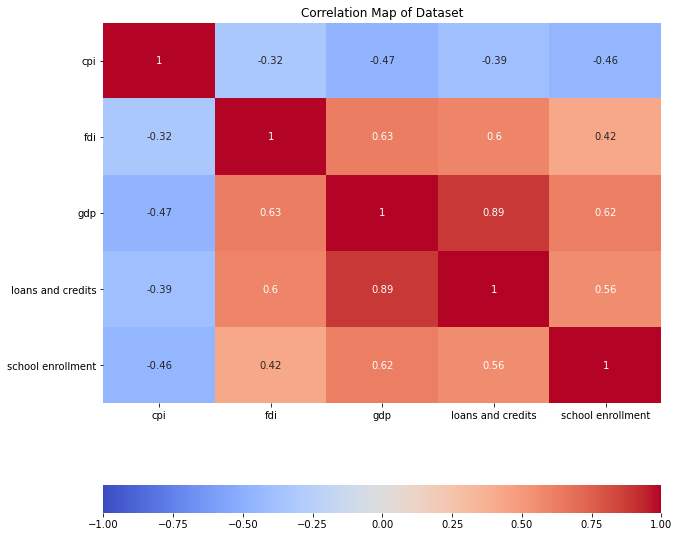

In [6]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
ax.set_title('Correlation Map of Dataset')
sns.heatmap(data.corr(), annot = True,fmt ='.2g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',  cbar_kws= {'orientation': 'horizontal'} )

In [7]:
data.head(10)

,cpi,fdi,gdp,loans and credits,school enrollment
date,,,,,
1980-01-01,3.950834,13284,7.933740,285.101869,91.313919
1980-04-01,3.673986,23024,7.936429,288.733354,91.313919
1980-07-01,1.832994,18852,7.957346,290.765992,91.313919
1980-10-01,2.640000,12512,8.001542,305.869014,91.313919
1981-01-01,2.650039,12584,8.046935,313.127417,89.999420
1981-04-01,2.315869,21176,8.059128,322.606677,89.999420
1981-07-01,2.820037,22020,8.089669,335.199471,89.999420
1981-10-01,1.443522,45004,8.095848,345.598000,89.999420
1982-01-01,0.818214,8616,8.093860,359.735746,93.175117


In [8]:
columns=data.columns

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore") 
criteria=["c","ct","ctt","nc"]
column=["Dataset","Level or Difference","Criter","P Value","Test-Statistic","Critical Value for %1","Passed or Not Passed-1","Critical Value for %5","Passed or Not Passed-5","Critical Value for %10","Passed or Not Passed-10"]
adfullresult=pd.DataFrame(columns=column)
#print(adfullresult)
for criter in criteria:
    if criter=="c":
        values="Constant"
    elif criter=="ct":
        values="Constant and Trend"
    elif criter=="ctt":
        values="Constant, Linear and Quadratic Trend"
    elif criter=="nc":
        values="Neither Constant Nor Trend"
    for columns in data.columns:
        X=data[f'{columns}']
        result = adfuller(X,regression=criter)
        #print(f'ADF Unit Root Test for {columns}: %f' % result[0])
        #print('p-value: %f' % result[1])
        #print('Critical Values:')
        for key, value in result[4].items():
            #print('\t%s: %.3f' % (key, value))
            df1=pd.DataFrame([[columns,"Level",values,result[1],result[0],pd.DataFrame.from_dict(result[4].items())[1][0],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][0],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][1],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][1],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][2],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][2],"True","False")]],columns=column)
        adfullresult=adfullresult.append(df1)
    diff_series=data.diff().dropna()
    for columns in diff_series.columns:
        X=diff_series[f'{columns}']
        result = adfuller(X,regression=criter)
        #print(f'ADF Unit Root Test for First Difference of {columns}: %f' % result[0])
        #print('p-value: %f' % result[1])
        #print('Critical Values:')
        for key, value in result[4].items():
            #print('\t%s: %.3f' % (key, value))
            df1=pd.DataFrame([[columns,"First Difference",values,result[1],result[0],pd.DataFrame.from_dict(result[4].items())[1][0],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][0],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][1],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][1],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][2],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][2],"True","False")]],columns=column)
        adfullresult=adfullresult.append(df1)
adfullresult.sort_values(["Dataset","Level or Difference","Criter"]).to_excel("ADF Sonuçları.xlsx")
adf=adfullresult.sort_values(["Dataset","Level or Difference","Criter"])
adf

,Dataset,Level or Difference,Criter,P Value,Test-Statistic,Critical Value for %1,Passed or Not Passed-1,Critical Value for %5,Passed or Not Passed-5,Critical Value for %10,Passed or Not Passed-10
0,cpi,First Difference,Constant,2.915230e-06,-5.430963,-3.473830,True,-2.880623,True,-2.576945,True
0,cpi,First Difference,Constant and Trend,3.004786e-05,-5.441459,-4.019192,True,-3.439584,True,-3.144123,True
0,cpi,First Difference,"Constant, Linear and Quadratic Trend",1.131794e-04,-5.526329,-4.448493,True,-3.871556,True,-3.577423,True
0,cpi,First Difference,Neither Constant Nor Trend,1.782913e-07,-5.387207,-2.580508,True,-1.942891,True,-1.615193,True
0,cpi,Level,Constant,7.279263e-04,-4.174363,-3.473830,True,-2.880623,True,-2.576945,True
0,cpi,Level,Constant and Trend,1.987956e-05,-5.532395,-4.019192,True,-3.439584,True,-3.144123,True
0,cpi,Level,"Constant, Linear and Quadratic Trend",1.957369e-04,-5.400831,-4.448493,True,-3.871556,True,-3.577423,True
0,cpi,Level,Neither Constant Nor Trend,1.927970e-02,-2.325952,-2.580508,False,-1.942891,True,-1.615193,True
0,fdi,First Difference,Constant,2.395688e-15,-9.170493,-3.472431,True,-2.880013,True,-2.576619,True
0,fdi,First Difference,Constant and Trend,1.576951e-13,-9.160742,-4.017241,True,-3.438651,True,-3.143577,True


In [10]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore") 
criteria=["c","ct"]
column=["Dataset","Level or Difference","Criter","P Value","Test-Statistic","Critical Value for %1","Passed or Not Passed-1","Critical Value for %5","Passed or Not Passed-5","Critical Value for %10","Passed or Not Passed-10"]
adfullresult=pd.DataFrame(columns=column)
kpssresult=pd.DataFrame(columns=column)

#print(adfullresult)
for criter in criteria:
    if criter=="c":
        values="Constant"
    elif criter=="ct":
        values="Constant and Trend"
    for columns in data.columns:
        X=data[f'{columns}']
        resultkpss = kpss(X,criter)
        #print(f'ADF Unit Root Test for {columns}: %f' % result[0])
        #print('p-value: %f' % result[1])
        #print('Critical Values:')
        for key, value in resultkpss[3].items():
            #print('\t%s: %.3f' % (key, value))
            df2=pd.DataFrame([[columns,"Level",values,resultkpss[1],result[0],pd.DataFrame.from_dict(resultkpss[3].items())[1][0],np.where(resultkpss[0]<pd.DataFrame.from_dict(resultkpss[3].items())[1][0],"True","False"),pd.DataFrame.from_dict(resultkpss[3].items())[1][1],np.where(resultkpss[0]<pd.DataFrame.from_dict(resultkpss[3].items())[1][1],"True","False"),pd.DataFrame.from_dict(resultkpss[3].items())[1][2],np.where(resultkpss[0]<pd.DataFrame.from_dict(resultkpss[3].items())[1][2],"True","False")]],columns=column)

        for key, value in result[4].items():
            #print('\t%s: %.3f' % (key, value))
            df1=pd.DataFrame([[columns,"Level",values,result[1],result[0],pd.DataFrame.from_dict(result[4].items())[1][0],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][0],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][1],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][1],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][2],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][2],"True","False")]],columns=column)
        kpssresult=kpssresult.append(df2)
    diff_series=data.diff().dropna()
    for columns in diff_series.columns:
        X=diff_series[f'{columns}']
        resultkpss = kpss(X,criter)
        #print(f'ADF Unit Root Test for First Difference of {columns}: %f' % result[0])
        #print('p-value: %f' % result[1])
        #print('Critical Values:')
        for key, value in result[4].items():
            #print('\t%s: %.3f' % (key, value))
            df2=pd.DataFrame([[columns,"First Difference",values,resultkpss[1],resultkpss[0],pd.DataFrame.from_dict(resultkpss[3].items())[1][0],np.where(resultkpss[0]<pd.DataFrame.from_dict(resultkpss[3].items())[1][0],"True","False"),pd.DataFrame.from_dict(resultkpss[3].items())[1][1],np.where(resultkpss[0]<pd.DataFrame.from_dict(resultkpss[3].items())[1][1],"True","False"),pd.DataFrame.from_dict(resultkpss[3].items())[1][2],np.where(resultkpss[0]<pd.DataFrame.from_dict(resultkpss[3].items())[1][2],"True","False")]],columns=column)

        for key, value in result[4].items():
            #print('\t%s: %.3f' % (key, value))
            df1=pd.DataFrame([[columns,"First Difference",values,result[1],result[0],pd.DataFrame.from_dict(result[4].items())[1][0],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][0],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][1],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][1],"True","False"),pd.DataFrame.from_dict(result[4].items())[1][2],np.where(result[0]<pd.DataFrame.from_dict(result[4].items())[1][2],"True","False")]],columns=column)
        kpssresult=kpssresult.append(df2)
kpssresult.sort_values(["Dataset","Level or Difference","Criter"]).to_excel("KPSS Sonuçları.xlsx")
kpssresults=kpssresult.sort_values(["Dataset","Level or Difference","Criter"])
kpssresults

,Dataset,Level or Difference,Criter,P Value,Test-Statistic,Critical Value for %1,Passed or Not Passed-1,Critical Value for %5,Passed or Not Passed-5,Critical Value for %10,Passed or Not Passed-10
0,cpi,First Difference,Constant,0.100000,0.205246,0.347,True,0.463,True,0.574,True
0,cpi,First Difference,Constant and Trend,0.100000,0.092500,0.119,True,0.146,True,0.176,True
0,cpi,Level,Constant,0.010000,-12.688578,0.347,False,0.463,False,0.574,False
0,cpi,Level,Constant and Trend,0.086908,-12.688578,0.119,False,0.146,True,0.176,True
0,fdi,First Difference,Constant,0.100000,0.090850,0.347,True,0.463,True,0.574,True
0,fdi,First Difference,Constant and Trend,0.100000,0.065807,0.119,True,0.146,True,0.176,True
0,fdi,Level,Constant,0.010000,-12.688578,0.347,False,0.463,False,0.574,False
0,fdi,Level,Constant and Trend,0.100000,-12.688578,0.119,True,0.146,True,0.176,True
0,gdp,First Difference,Constant,0.010000,0.862520,0.347,False,0.463,False,0.574,False
0,gdp,First Difference,Constant and Trend,0.100000,0.055790,0.119,True,0.146,True,0.176,True


In [11]:
columns=data.columns

for i in columns:
    print(i)

cpi
fdi
gdp
loans and credits
school enrollment


In [19]:
print("*****  ADF TEST  *********")


for i in columns:
    adf[adf['Dataset']==i].to_excel(i+"_adf.xlsx")
    print(adf[adf['Dataset']==i][['Dataset','Criter','Level or Difference', 'Passed or Not Passed-1']])
    
for i in range(0,9):
    print("                                            -------------             ")
    
    
print("*****  KPSS TEST *********")
for i in columns:
    kpssresults[kpssresults['Dataset']==i].to_excel(i+"_kpss.xlsx")
    print(kpssresults[kpssresults['Dataset']==i][['Dataset','Criter','Level or Difference', 'Passed or Not Passed-1']])
print("*****  PP TEST  *********")

for i in columns:
    print(i + " variable - constant - level - PP Test")
    pp = PhillipsPerron(data[i])
    pp.trend = 'c'
    print(pp)
    print("               ")
    print("---------------")
    print("               ")
    print(i + " variable - trend - level - PP Test")
    pp = PhillipsPerron(data[i])
    pp.trend = 'ct'
    print(pp)
    print("               ")
    print("---------------")
    print("               ")
    print(i + " variable - constant - First Differenct - PP Test")
    pp = PhillipsPerron(data[i].diff().dropna())
    pp.trend = 'c'
    print(pp)
    print("               ")
    print("---------------")
    print("               ")
    print(i + " variable - trend - First Differenct - PP Test")
    pp = PhillipsPerron(data[i].diff().dropna())
    pp.trend = 'ct'
    print(pp)
    print("               ")
    print("---------------")
    print("               ")

*****  ADF TEST  *********
  Dataset                                Criter Level or Difference  \
0     cpi                              Constant    First Difference   
0     cpi                    Constant and Trend    First Difference   
0     cpi  Constant, Linear and Quadratic Trend    First Difference   
0     cpi            Neither Constant Nor Trend    First Difference   
0     cpi                              Constant               Level   
0     cpi                    Constant and Trend               Level   
0     cpi  Constant, Linear and Quadratic Trend               Level   
0     cpi            Neither Constant Nor Trend               Level   

  Passed or Not Passed-1  
0                   True  
0                   True  
0                   True  
0                   True  
0                   True  
0                   True  
0                   True  
0                  False  
  Dataset                                Criter Level or Difference  \
0     fdi          

---------------
               


cpi


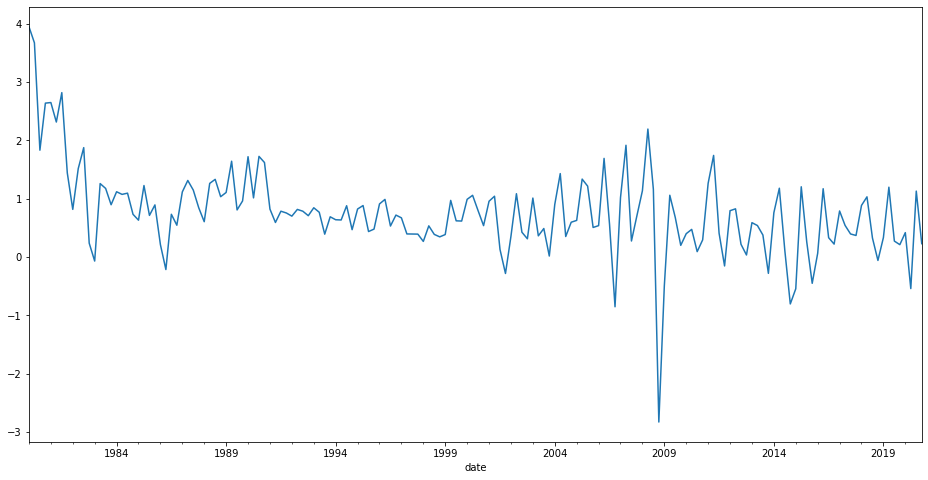

fdi


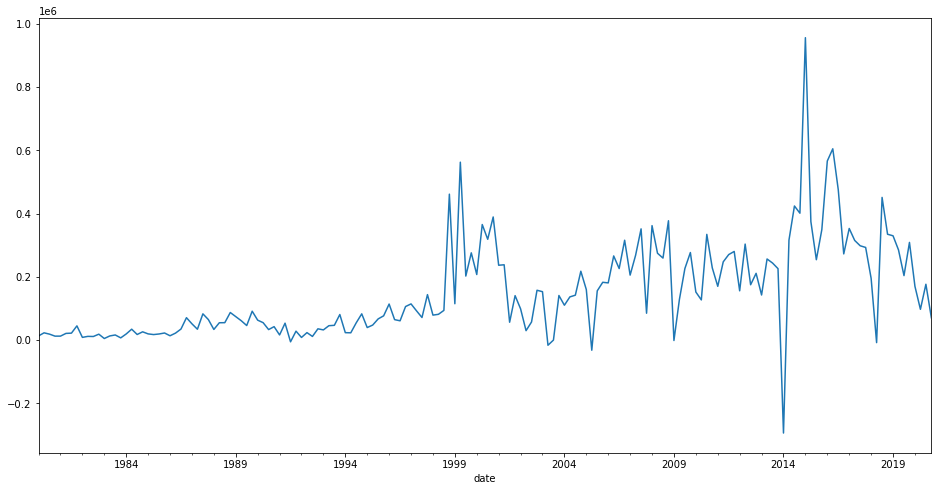

gdp


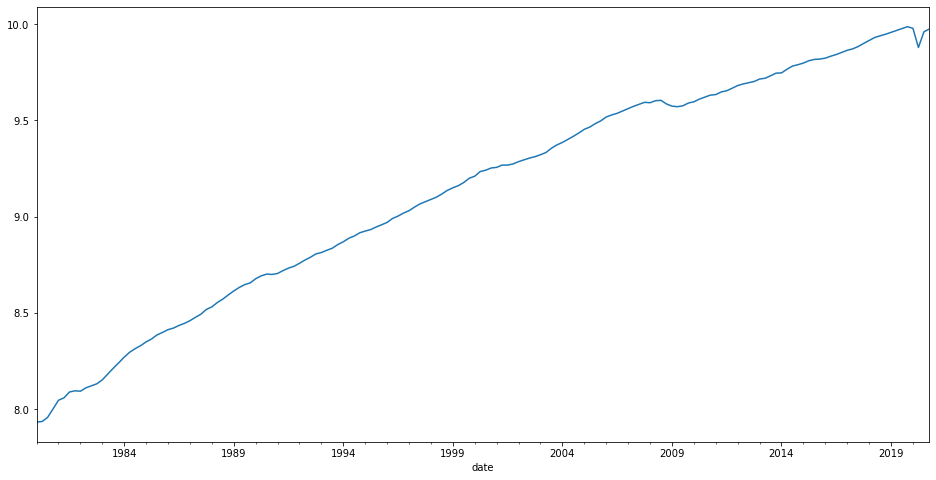

loans and credits


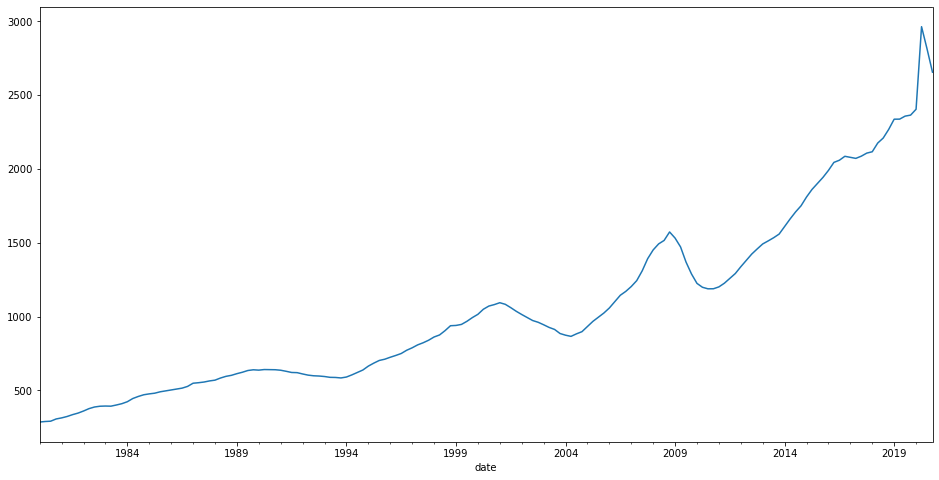

school enrollment


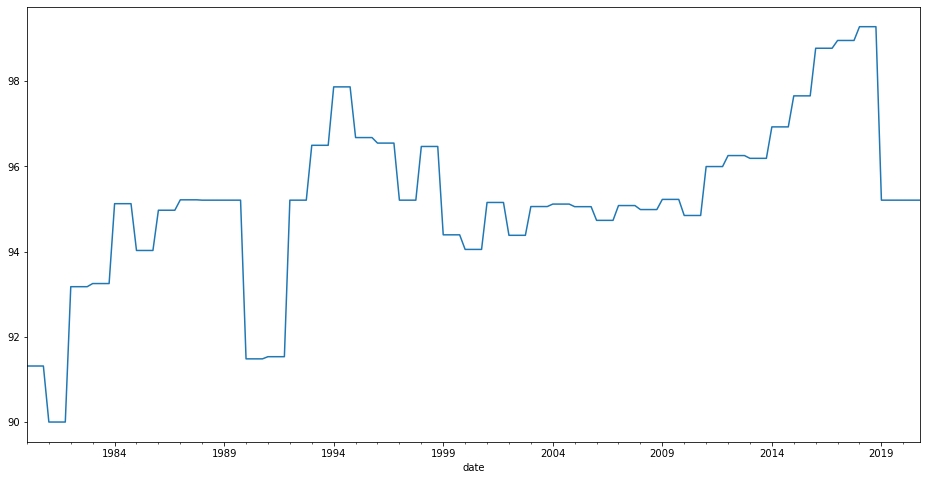

In [20]:
columns=data.columns
for i in columns:
    print(i)
    fig=data[i].plot(figsize=(16,8))
    fig.figure.savefig(i+"_time_series_level_plot"+".png")
    plt.show()

cpi


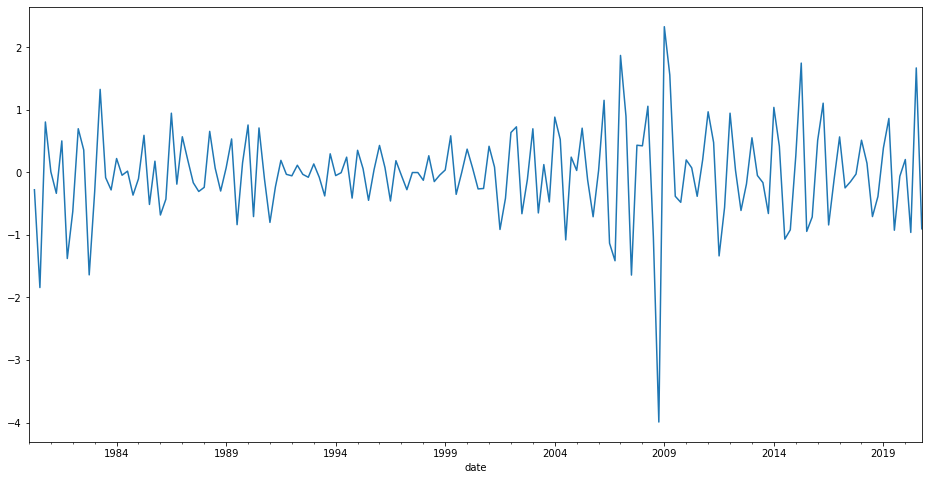

fdi


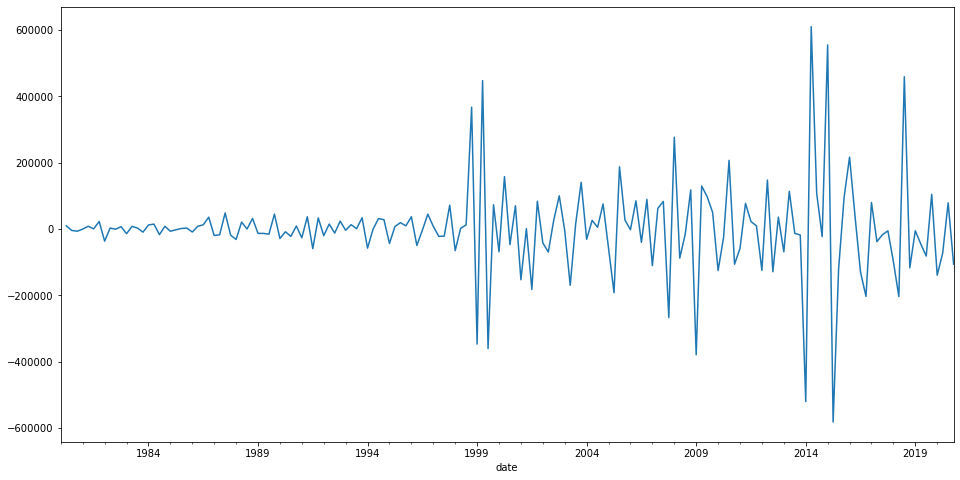

gdp


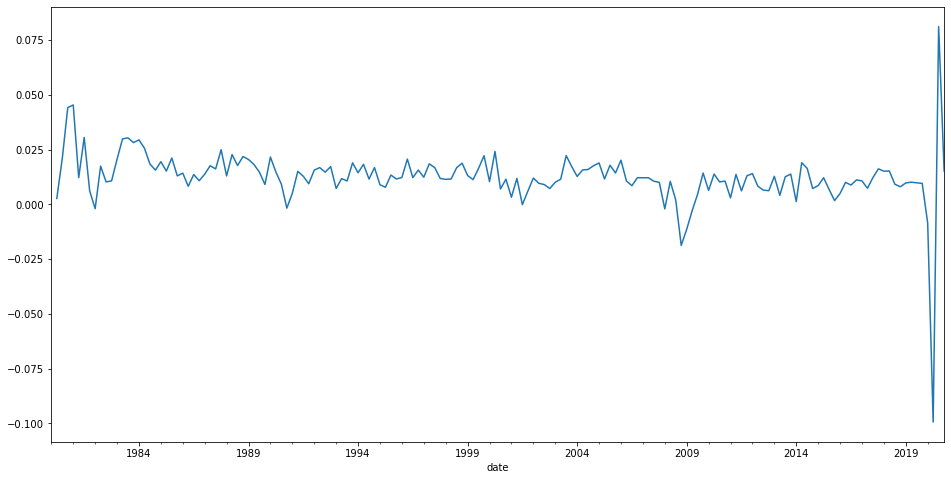

loans and credits


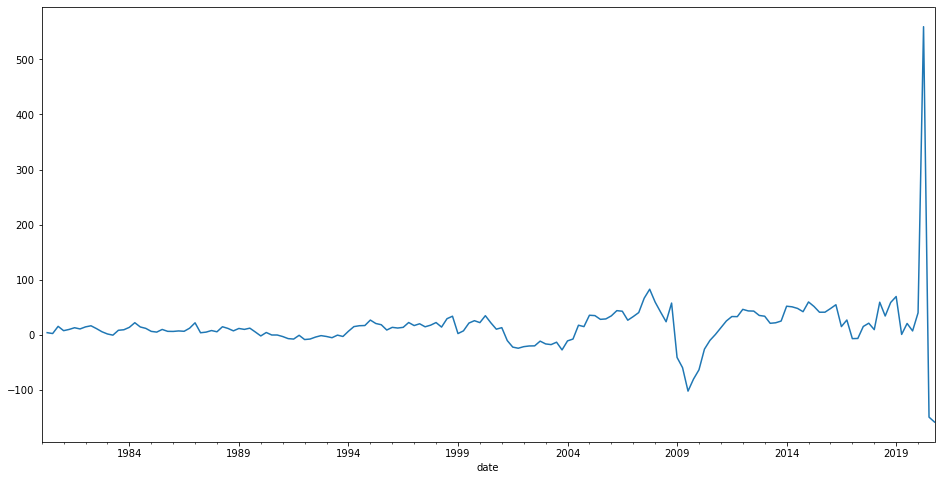

school enrollment


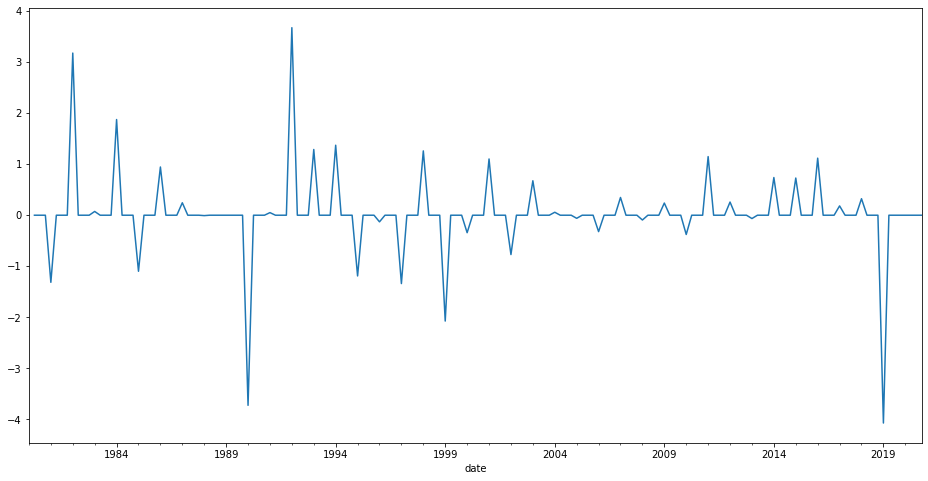

In [21]:
columns=data.columns
for i in columns:
    print(i)
    fig=data[i].diff().plot(figsize=(16,8))
    fig.figure.savefig(i+"_time_series_diff_plot"+".png")
    plt.show()

In [22]:
columns

Index(['cpi', 'fdi', 'gdp', 'loans and credits', 'school enrollment'], dtype='object')

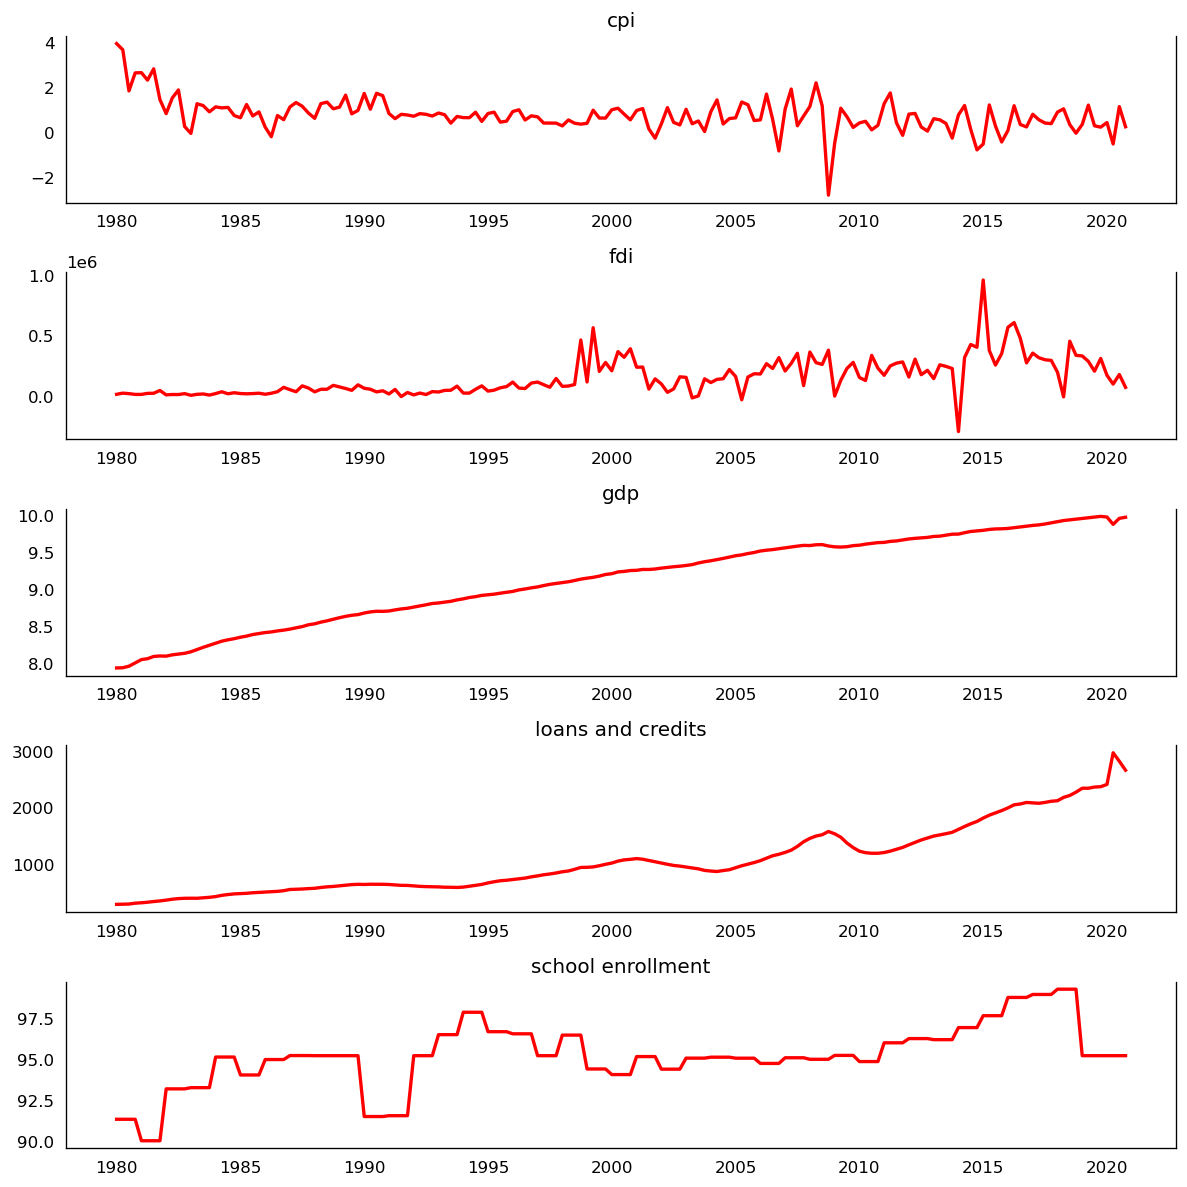

In [23]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    df = data[data.columns[i]]
    ax.plot(df, color='red', linewidth=2)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

In [24]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
model= VAR(data)
x = model.select_order(maxlags=3)
x

In [25]:
model = VAR(data)
liste=["Lag Order","AIC","BIC","FPE","HQIC"]
lagselection=pd.DataFrame(columns=liste)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    #print('Lag Order =', i)
    #print('AIC : ', result.aic)
    #print('BIC : ', result.bic)
    #print('FPE : ', result.fpe)
    #print('HQIC: ', result.hqic, '\n')
    res=pd.DataFrame([[i,result.aic,result.bic,result.fpe,result.hqic]],columns=liste)
    lagselection=lagselection.append(res)

lagselection.to_excel("Lag.xlsx")
lagselection

,Lag Order,AIC,BIC,FPE,HQIC
0,1,20.114254,20.683656,5.439786e+08,20.345425
0,2,19.609877,20.658135,3.287879e+08,20.035486
0,3,19.428055,20.959188,2.747429e+08,20.049757
0,4,19.333098,21.351181,2.509372e+08,20.152571
0,5,19.413682,21.922849,2.739607e+08,20.432628
0,6,19.311522,22.315966,2.500812e+08,20.531665
0,7,19.347158,22.851134,2.632626e+08,20.770246
0,8,19.315966,23.323789,2.607619e+08,20.943770
0,9,19.199976,23.716027,2.390109e+08,21.034295


In [26]:
model = VAR(data)

x=pd.DataFrame(model.select_order(6).summary(),columns=['LAG ORDER','AIC', 'BIC','FPE','HQIC'])[1:]
x.to_excel('lag_order.xlsx')
x

,LAG ORDER,AIC,BIC,FPE,HQIC
1,0,33.09,33.19,2.345e+14,33.13
2,1,19.99,20.57,4.817e+08,20.23
3,2,19.46,20.53*,2.842e+08,19.90
4,3,19.21*,20.76,2.206e+08*,19.84*
5,4,19.26,21.30,2.338e+08,20.09
6,5,19.40,21.92,2.715e+08,20.43
7,6,19.31,22.32,2.501e+08,20.53


In [27]:
result=VAR(data).fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jun, 2021
Time:                     01:38:12
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.9228
Nobs:                     159.000    HQIC:                   20.4326
Log likelihood:          -2541.44    FPE:                2.73961e+08
AIC:                      19.4137    Det(Omega_mle):     1.28474e+08
--------------------------------------------------------------------
Results for equation cpi
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        3.384030         3.901887            0.867           0.386
L1.cpi                       0.322613         0.092073            3.504           0.000
L1.fdi                       0.000

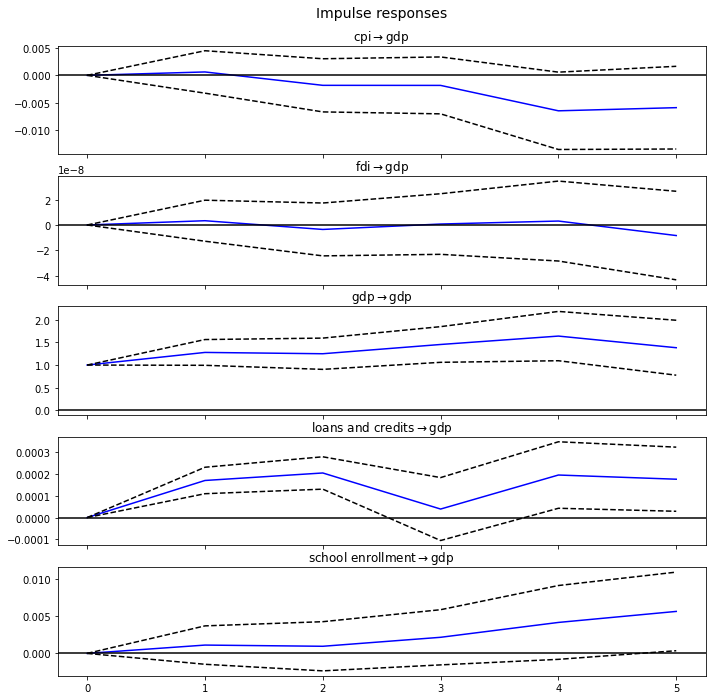

In [28]:
irf = result.irf(5)
irf.plot(response='gdp')
plt.savefig('irf.png')

In [29]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=3 #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
import numpy as np
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger  Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grang = grangers_causation_matrix(pd.DataFrame(np.log(data)).diff().dropna(), variables = data.columns)  
grang

,cpi_x,fdi_x,gdp_x,loans and credits_x,school enrollment_x
cpi_y,1.0000,0.0156,0.3136,0.6595,0.8842
fdi_y,0.2985,1.0000,0.7185,0.1450,0.2812
gdp_y,0.4638,0.6112,1.0000,0.0354,0.0471
loans and credits_y,0.2701,0.3500,0.0085,1.0000,0.8573
school enrollment_y,0.7245,0.8027,0.2592,0.1998,1.0000


In [30]:
df = pd.concat((result.params, result.tvalues), axis=1)
df

,cpi,fdi,gdp,loans and credits,school enrollment,cpi,fdi,gdp,loans and credits,school enrollment
const,3.384030e+00,-4.150814e+04,-6.108759e-02,189.107898,1.825438e+01,0.867280,-0.046305,-0.724163,0.495206,3.296478
L1.cpi,3.226132e-01,2.986019e+04,6.240281e-04,3.862417,-1.863696e-01,3.503892,1.411662,0.313495,0.428626,-1.426269
L1.fdi,3.833675e-07,2.036105e-01,3.352168e-09,-0.000010,-4.253781e-07,1.006719,2.327356,0.407171,-0.280284,-0.787093
L1.gdp,6.267026e+00,-6.070414e+05,1.279762e+00,-93.933598,-2.531571e+00,0.930349,-0.392259,8.787635,-0.142481,-0.264809
L1.loans and credits,3.269658e-03,-3.289096e+01,1.702001e-04,0.833443,-1.170982e-03,2.282375,-0.099938,5.495444,5.944454,-0.575960
L1.school enrollment,-4.822305e-02,-9.706269e+03,1.125553e-03,2.470274,9.032862e-01,-0.786835,-0.689368,0.849481,0.411837,10.385138
L2.cpi,-5.724005e-01,-1.041181e+04,-3.384546e-03,2.308477,1.648880e-02,-5.927584,-0.469325,-1.621199,0.244261,0.120316
L2.fdi,-3.404850e-07,1.080826e-01,-6.464388e-09,0.000013,-2.493680e-07,-0.871179,1.203746,-0.765059,0.332287,-0.449581
L2.gdp,4.711093e-01,2.686056e+06,-3.701648e-01,2102.898859,2.004593e+01,0.042894,1.064537,-1.558941,1.956346,1.286057
L2.loans and credits,-3.697457e-03,1.796742e+02,-1.556359e-04,0.137024,4.690283e-03,-1.376584,0.291175,-2.680200,0.521253,1.230428


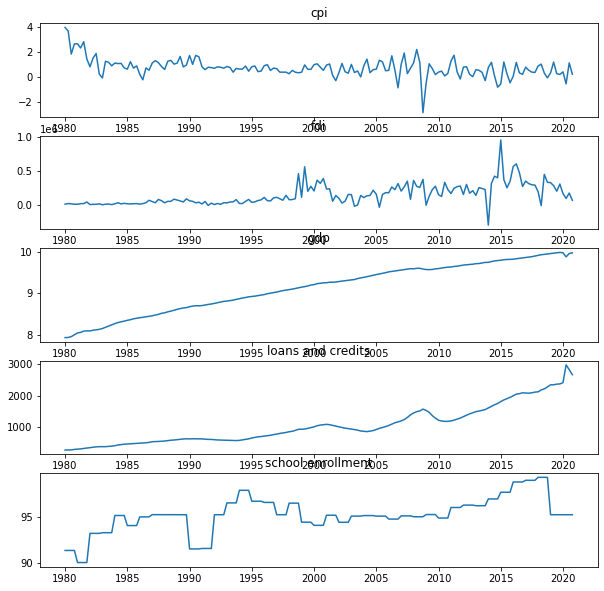

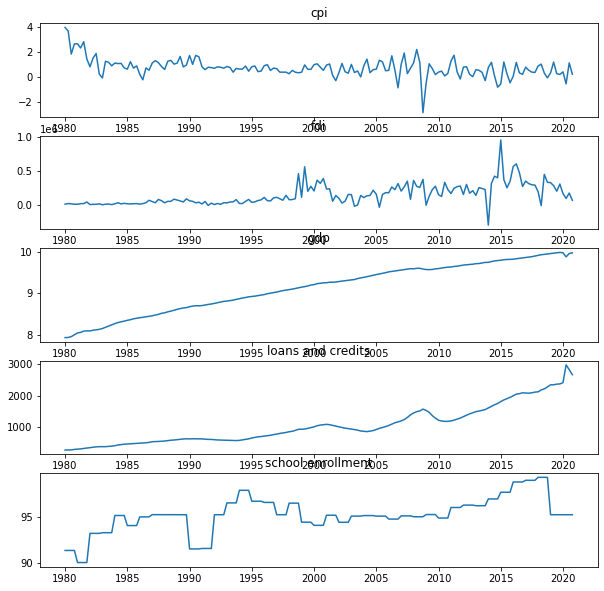

In [31]:
result.plot()

In [32]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(data, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(data,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
cpi    ::  95.49     > 60.0627   =>   True
fdi    ::  56.28     > 40.1749   =>   True
gdp    ::  24.29     > 24.2761   =>   True
loans and credits ::  10.41     > 12.3212   =>   False
school enrollment ::  2.01      > 4.1296    =>   False


In [33]:
from johansen import coint_johansen
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """
        """
        H0: no cointegrating equation -> No cointegrating vectors
        H1: H0 is not true
        """
        N, l = y.shape
        jres = coint_johansen(y, 0, p)
        
        print("Critical values (90%, 95%, 99%) of maximum eigenvalue statistic.: ")
        print(jres.cvm, "\n")
        print("Maximum eigenvalue statistic:")
        print(jres.lr2, "\n")
        
        print("Critical values (90%, 95%, 99%) of trace statistic:")
        print(jres.cvt, "\n")
        print("Trace statistic:")
        print(jres.lr1, "\n")
        print("Eigenvalues of VECM coefficient matrix:")
        print(jres.eig, "\n")

        print("Eigenvectors of VECM coefficient matrix:")
        print(jres.evec, "\n")

        print("Test method:")
        print(jres.meth, "\n")

        print("Residuals for ΔY.:")
        print(jres.r0t, "\n")

        print("Residuals for Y−1:")
        print(jres.rkt, "\n")
        
        
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values
        
        """
        IF the trace statistic for each series is greater than the critical value THEN:
        that corresponding eigenvector is a cointegration vector
        """
        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0:90%  1:95%  2:99%
                r = i + 1
        jres.r = r
        jres.evecr = jres.evec[:, :r]

        return jres

p=1
jres=get_johansen(data,p)
print("There are ", jres.r, "cointegration vectors")
print(jres.evecr)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 201.1191 65.8202 69.8189 77.8202
r = 1 	 80.0192 44.4929 47.8545 54.6815
r = 2 	 42.8072 27.0669 29.7961 35.4628
r = 3 	 12.8423 13.4294 15.4943 19.9349
r = 4 	 1.6317 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 121.1 31.2379 33.8777 39.3693
r = 1 	 37.2119 25.1236 27.5858 32.7172
r = 2 	 29.9649 18.8928 21.1314 25.865
r = 3 	 11.2106 12.2971 14.2639 18.52
r = 4 	 1.6317 2.7055 3.8415 6.6349
--------------------------------------------------
eigenvectors:
 [[ 2.03414809e+00  2.72083996e-01 -3.25110223e-01 -8.01015882e-02
   1.13532607e-01]
 [-4.94130540e-07  9.50809544e-06  4.83433682e-06 -3.92922041e-07
   1.56481079e-06]
 [ 5.10068337e-01 -1.03460492e+00 -1.69112704e+00  3.93606516e-01
   3.92256393e+00]
 [-2.93418787e-04  3.50065966e-04 -1.22296570e-03  5.